In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Dropout

In [4]:
data = pd.read_csv("/content/data.csv")

In [5]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [6]:
data.shape

(9172, 31)

In [7]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [8]:
data.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)

In [9]:
# re-mapping target vaues to diagnostic groups
diagnoses = {'A': 'hyperthyroid conditions', 
             'B': 'hyperthyroid conditions', 
             'C': 'hyperthyroid conditions', 
             'D': 'hyperthyroid conditions',
             'E': 'hypothyroid conditions', 
             'F': 'hypothyroid conditions', 
             'G': 'hypothyroid conditions', 
             'H': 'hypothyroid conditions',
             'I': 'binding protein',
             'J': 'binding protein',
             'K': 'general health',
             'L': 'replacement theraphy',
             'M': 'replacement theraphy',
             'N': 'replacement theraphy',
             'O': 'antithyroid treatment',
             'P': 'antithyroid treatment',
             'Q': 'antithyroid treatment',
             'R': 'miscellaneous',
             'S': 'miscellaneous',
             'T': 'miscellaneous'}
data['target'] = data['target'].map(diagnoses) # re-mapping

In [10]:

data.dropna(subset=['target'], inplace=True)

In [11]:
data['target'].value_counts()

hypothyroid conditions     593
general health             436
binding protein            376
replacement theraphy       336
miscellaneous              281
hyperthyroid conditions    182
antithyroid treatment       33
Name: target, dtype: int64

In [12]:
#Checking whether the age above 100
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target


In [13]:
#spilitting the data values as x and y
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [14]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN
9162,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN


In [15]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [16]:
x['sex'].replace(np.nan, 'F', inplace=True)

In [17]:
x['sex'].value_counts()

F    1701
M     536
Name: sex, dtype: int64

In [18]:
x["sex"] = x["sex"].astype("int64", errors='ignore')

In [19]:
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2237 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [21]:
#Encoding the categorical data
#Encoding the independent(output)variable
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
#Categorical data
ordinal_encoder = OrdinalEncoder(dtype = 'int64')
x.iloc[:,1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])
#ordinal_encoder.fit_transform(x[['sex']])

<ipython-input-21-f501f23a1837>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:,1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [22]:
x.replace(np.nan,'0', inplace=True)

In [23]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.81,0,31.0,0.55,56.0,0
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.18,0,28.0,0.87,32.0,0
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,44.0,0.53,83.0,0
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,84.0,1.26,67.0,0


In [24]:
#Applying Label encoder on y
label_encoder = LabelEncoder()
y_dt=label_encoder.fit_transform(y)
y=pd.DataFrame(y_dt, columns=['target'])

In [25]:
y

,target
0,5
1,4
2,5
3,1
4,6
...,...
2232,2
2233,2
2234,1
2235,1


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [27]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

target
4         471
2         351
1         302
6         265
5         230
3         144
0          26
dtype: int64

In [28]:
os = SMOTE(random_state=0,k_neighbors=1)
x_train_bal,y_train_bal = os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal = os.fit_resample(x_test,y_test)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_bal = sc.fit_transform(x_train_bal)
x_test_bal=sc.transform(x_test_bal)

In [30]:
x_train_bal

array([[-1.62721505, -0.44060477, -0.4238    , ..., -2.50870684,
        -1.40088079,  3.29445097],
       [-0.11561403, -0.44060477,  2.35960359, ..., -0.26259147,
         0.0720981 , -0.19494049],
       [ 1.1874903 ,  2.26960776, -0.4238    , ...,  0.17039463,
        -0.19352104, -0.19494049],
       ...,
       [ 1.395987  , -0.44060477,  2.35960359, ...,  0.43615031,
         0.06101022, -0.19494049],
       [ 0.72802783, -0.44060477,  2.35960359, ...,  0.143333  ,
         0.89086631, -0.19494049],
       [ 1.15628145, -0.44060477,  2.35960359, ...,  0.39723515,
        -0.26588659, -0.19494049]])

In [31]:
columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4 ','T4U','FTI','TBG']

In [32]:
x_test_bal=pd.DataFrame(x_test_bal,columns=columns)

In [33]:
x_train_bal=pd.DataFrame(x_train_bal,columns=columns)

In [34]:
x_train_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-1.627215,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.315458,-1.035358,-1.704935,-2.508707,-1.400881,3.294451
1,-0.115614,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.090056,0.155233,-0.197223,-0.262591,0.072098,-0.194940
2,1.187490,2.269608,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.278907,-0.471394,-0.227079,0.170395,-0.193521,-0.194940
3,-1.366594,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,7.283487,-0.024637,-0.107982,-0.284999,0.969848,0.041622,0.495134,-0.133153,-0.194940
4,-0.167738,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.306321,4.541622,1.459767,-0.127283,1.496783,-0.194940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,0.546923,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.114424,0.343221,-0.148122,-0.146517,0.040168,-0.194940
3293,0.383062,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.309176,-0.856540,0.565143,-0.513902,1.085434,-0.194940
3294,1.395987,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.095452,-0.172405,0.248906,0.436150,0.061010,-0.194940
3295,0.728028,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.311566,0.087864,1.071643,0.143333,0.890866,-0.194940


In [35]:
#perform feature importance
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier().fit(x_train_bal, y_train_bal)
results = permutation_importance(rfr,x_train_bal,y_train_bal, scoring='accuracy')

<ipython-input-35-27298fb95e89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = RandomForestClassifier().fit(x_train_bal, y_train_bal)


feature: age                  Score: 0.0
feature: sex                  Score: 0.0
feature: on_thyroxine         Score: 0.0
feature: query_on_thyroxine   Score: 0.0
feature: on_antithyroid_meds  Score: 0.0
feature: sick                 Score: 0.00024264482863207705
feature: pregnant             Score: 0.0003033060357900963
feature: thyroid_surgery      Score: 0.0003033060357900963
feature: I131_treatment       Score: 0.0006066120715801926
feature: query_hypothyroid    Score: 0.0007885956930542726
feature: query_hyperthyroid   Score: 0.0012132241431604962
feature: lithium              Score: 0.0015165301789505925
feature: goitre               Score: 0.004852896572641785
feature: tumor                Score: 0.009827115559599652
feature: hypopituitary        Score: 0.01540794661813769
feature: psych                Score: 0.04670912951167725
feature: TSH                  Score: 0.05744616317864728
feature: T3                   Score: 0.07424931756141948
feature: TT4                  Score: 

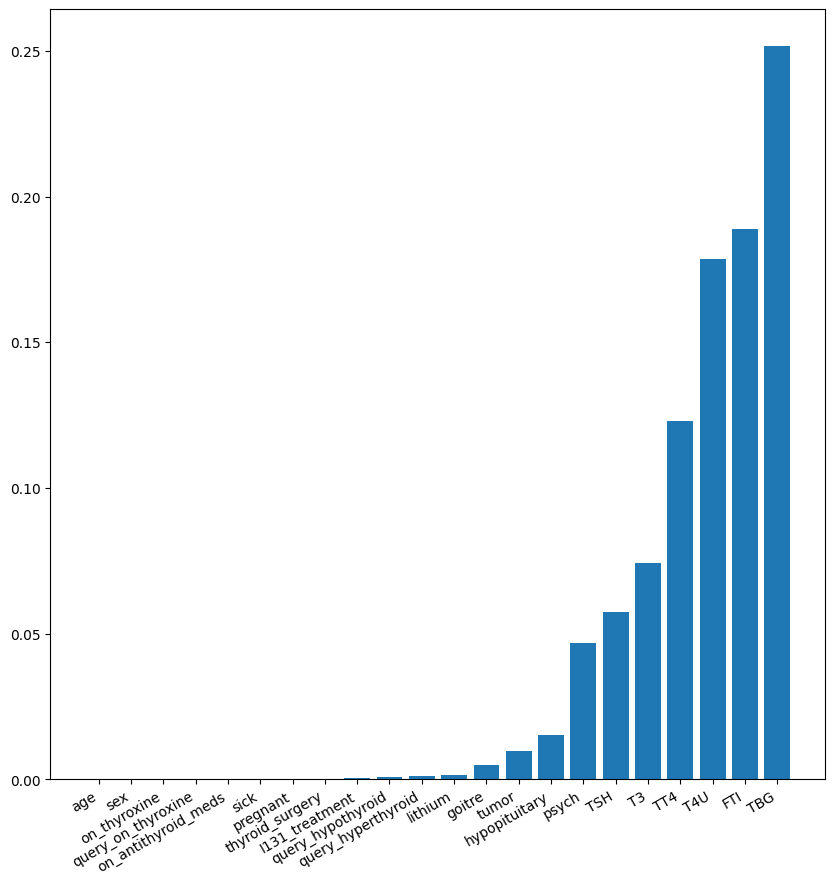

In [36]:
#gets importance
feature_importance=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']
importance = results.importances_mean
importance = np.sort(importance)
#summarize feature importance
for i,v in enumerate(importance):
  i=feature_importance[i]
  print('feature: {:<20} Score: {}'. format(i,v))
#plot important feature

plt.figure(figsize=(10,10))
plt.bar(x=feature_importance, height = importance)
plt.xticks(rotation=30, ha='right')
plt.show()

In [37]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0


In [38]:
# printing all columns of the dataframe
print(data.columns.tolist())

['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'target']


In [39]:
x_train_bal.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-1.627215,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.315458,-1.035358,-1.704935,-2.508707,-1.400881,3.294451
1,-0.115614,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.090056,0.155233,-0.197223,-0.262591,0.072098,-0.194940
2,1.187490,2.269608,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.278907,-0.471394,-0.227079,0.170395,-0.193521,-0.194940
3,-1.366594,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,7.283487,-0.024637,-0.107982,-0.284999,0.969848,0.041622,0.495134,-0.133153,-0.194940
4,-0.167738,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.306321,4.541622,1.459767,-0.127283,1.496783,-0.194940


In [40]:
x_train_bal = x_train_bal.drop(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium'], axis=1)


In [49]:
x_train_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.052319,-0.137297,-0.024637,-0.107982,-0.315458,-1.035358,-1.704935,-2.508707,-1.400881,3.294451
1,-0.052319,-0.137297,-0.024637,-0.107982,-0.090056,0.155233,-0.197223,-0.262591,0.072098,-0.194940
2,-0.052319,-0.137297,-0.024637,-0.107982,-0.278907,-0.471394,-0.227079,0.170395,-0.193521,-0.194940
3,-0.052319,7.283487,-0.024637,-0.107982,-0.284999,0.969848,0.041622,0.495134,-0.133153,-0.194940
4,-0.052319,-0.137297,-0.024637,-0.107982,-0.306321,4.541622,1.459767,-0.127283,1.496783,-0.194940


In [51]:
x_test_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.052319,-0.137297,-0.024637,-0.107982,-0.312412,0.593872,0.788014,1.063428,0.132466,-0.19494
1,-0.052319,-0.137297,-0.024637,-0.107982,-0.314240,0.781860,0.444674,1.767031,-0.302183,-0.19494
2,-0.052319,-0.137297,-0.024637,-0.107982,1.298911,-0.408731,-1.227244,-0.397900,-0.905863,-0.19494
3,-0.052319,-0.137297,-0.024637,-0.107982,-0.166205,-0.471394,-0.227079,-0.397900,0.132466,-0.19494
4,-0.052319,-0.137297,-0.024637,-0.107982,-0.227125,-0.346068,-0.301718,-0.830886,0.434306,-0.19494


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   int64  
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

<ipython-input-53-974c67d99442>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = x.corr()


<Axes: >

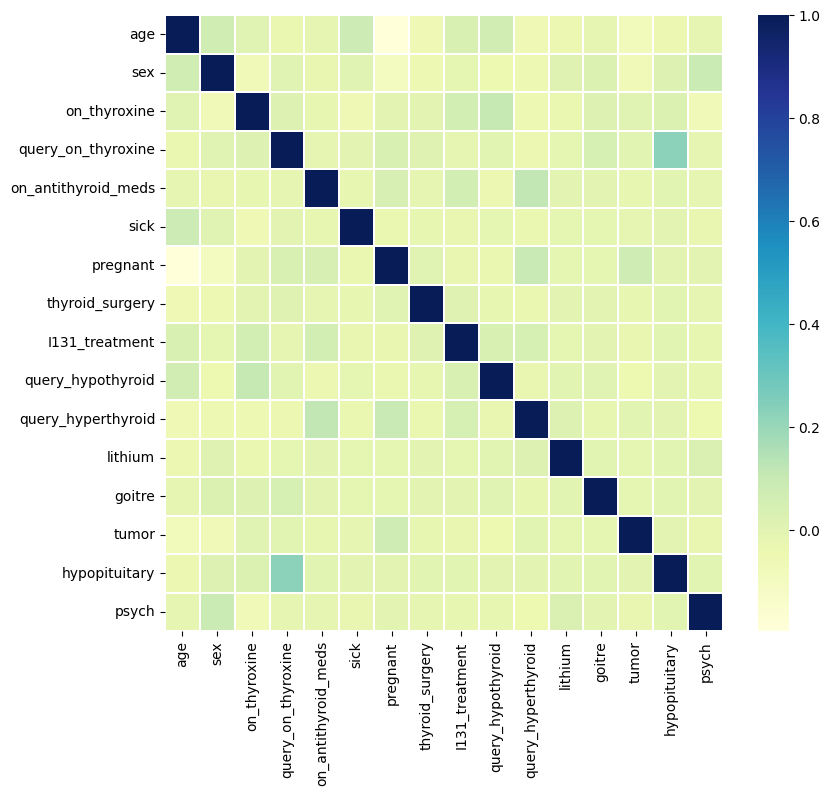

In [53]:
#checking correlation using Heatmap
import seaborn as sns
corrmat = x.corr()

f, ax = plt.subplots(figsize =(9,8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [54]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object
smote = SMOTE()

# Fit the SMOTE object to the original input data and oversample it
x_os, y_os = smote.fit_resample(x, y)

In [55]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(x_os,y_os.values.ravel())
y_pred = rf.predict(x_os)
rf = RandomForestClassifier()

In [56]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os, y_os, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier object and fit the training data
rf = RandomForestClassifier()
rf.fit(x_train_os, y_train_os)

# Use the trained classifier to make predictions on the test data
y_pred = rf.predict(x_test_os)


<ipython-input-56-abc5a2d34fa6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_os, y_train_os)


In [57]:
x_train_os_with_TT4 = x_train_os[['TT4'] + list(x_train_os.columns[:-1])]

# fit the random forest model with the updated feature matrix
rf.fit(x_train_os_with_TT4, y_train_os)

<ipython-input-57-0d3b3d172e83>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_os_with_TT4, y_train_os)


RandomForestClassifier()

In [58]:
rf = RandomForestClassifier()
rf.fit(x,y.values.ravel())

RandomForestClassifier()

In [59]:
print(x_train_bal.columns)

Index(['goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4 ', 'T4U',
       'FTI', 'TBG'],
      dtype='object')


In [60]:
data = data.assign(TT4=[0] * len(data))


In [61]:
features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG']
x = data[features]


In [62]:
y_pred = rf.predict(x_test_os)

In [63]:
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_os, rf.predict(x_os))
train_score

0.9250782943868947

In [64]:
accuracy_score(y_test_os,y_pred)

0.9181708784596871

In [65]:
x_train_os['age']=x_train_os['age'].astype('float')
x_train_os['TSH']=x_train_os['TSH'].astype('float')
x_train_os['T3']=x_train_os['T3'].astype('float')
x_train_os['TT4']=x_train_os['TT4'].astype('float')
x_train_os['T4U']=x_train_os['T4U'].astype('float')
x_train_os['FTI']=x_train_os['FTI'].astype('float')
x_train_os['TBG']=x_train_os['TBG'].astype('float')

In [66]:
x_test_os['age']=x_test_os['age'].astype('float')
x_test_os['TSH']=x_test_os['TSH'].astype('float')
x_test_os['T3']=x_test_os['T3'].astype('float')
x_test_os['TT4']=x_test_os['TT4'].astype('float')
x_test_os['T4U']=x_test_os['T4U'].astype('float')
x_test_os['FTI']=x_test_os['FTI'].astype('float')
x_test_os['TBG']=x_test_os['TBG'].astype('float')

In [67]:
x_train_os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 4096 to 860
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3320 non-null   float64
 1   sex                  3320 non-null   int64  
 2   on_thyroxine         3320 non-null   int64  
 3   query_on_thyroxine   3320 non-null   int64  
 4   on_antithyroid_meds  3320 non-null   int64  
 5   sick                 3320 non-null   int64  
 6   pregnant             3320 non-null   int64  
 7   thyroid_surgery      3320 non-null   int64  
 8   I131_treatment       3320 non-null   int64  
 9   query_hypothyroid    3320 non-null   int64  
 10  query_hyperthyroid   3320 non-null   int64  
 11  lithium              3320 non-null   int64  
 12  goitre               3320 non-null   int64  
 13  tumor                3320 non-null   int64  
 14  hypopituitary        3320 non-null   int64  
 15  psych                3320 non-null  

In [68]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier()
xgb1.fit(x_train_os,y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [69]:
y_pred = xgb1.predict(x_test_os)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(x_train_os.columns)

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG'],
      dtype='object')


In [72]:
print(classification_report(y_test_os,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       116
           1       0.97      0.92      0.95       104
           2       0.98      0.99      0.99       128
           3       0.88      0.94      0.91       119
           4       0.98      0.98      0.98       125
           5       0.95      0.94      0.95       119
           6       0.99      0.96      0.97       120

    accuracy                           0.96       831
   macro avg       0.96      0.96      0.96       831
weighted avg       0.96      0.96      0.96       831



In [73]:
accuracy_score(y_test_os,y_pred)

0.9578820697954272

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

sv= SVC()

In [75]:
sv.fit(x_train_bal,y_train_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [76]:
y_pred = sv.predict(x_test_bal)

In [77]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       122
           1       0.76      0.81      0.79       122
           2       0.88      0.93      0.90       122
           3       0.71      0.65      0.68       122
           4       0.71      0.63      0.67       122
           5       0.76      0.54      0.63       122
           6       0.49      0.57      0.52       122

    accuracy                           0.71       854
   macro avg       0.72      0.71      0.71       854
weighted avg       0.72      0.71      0.71       854



In [78]:
train_score=accuracy_score(y_train_bal,sv.predict(x_train_bal))
train_score

0.7154989384288747

In [79]:
model = Sequential()

In [80]:
model.add(Dense(units = 128, activation ='relu'))

In [81]:
model.add(Dense(units =128, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units =256, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units =128, activation='relu', kernel_initializer='random_uniform'))

In [82]:
model.add(Dense(units = 7, activation='softmax'))

In [ ]:
model.summary()

In [83]:
y_train_bal['target'].unique()

array([5, 6, 2, 3, 1, 4, 0])

In [84]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_bal, y_train_bal, validation_data=[x_test_bal, y_test_bal], epochs=15)


Epoch 1/15
104/104 [==============================] - 2s 5ms/step - loss: 1.3263 - accuracy: 0.5020 - val_loss: 0.9840 - val_accuracy: 0.6534
Epoch 2/15
104/104 [==============================] - 0s 4ms/step - loss: 0.9589 - accuracy: 0.6375 - val_loss: 0.8465 - val_accuracy: 0.7073
Epoch 3/15
104/104 [==============================] - 0s 3ms/step - loss: 0.8417 - accuracy: 0.6749 - val_loss: 0.8060 - val_accuracy: 0.7026
Epoch 4/15
104/104 [==============================] - 0s 4ms/step - loss: 0.7685 - accuracy: 0.6958 - val_loss: 0.7334 - val_accuracy: 0.7213
Epoch 5/15
104/104 [==============================] - 1s 5ms/step - loss: 0.7188 - accuracy: 0.7094 - val_loss: 0.7408 - val_accuracy: 0.7283
Epoch 6/15
104/104 [==============================] - 0s 5ms/step - loss: 0.6649 - accuracy: 0.7255 - val_loss: 0.7817 - val_accuracy: 0.7213
Epoch 7/15
104/104 [==============================] - 1s 5ms/step - loss: 0.6527 - accuracy: 0.7270 - val_loss: 0.7343 - val_accuracy: 0.7155
Epoch 

In [85]:
input_data=np.array([0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]).reshape(-1,1)  


In [86]:
x_train_bal.shape

(3297, 10)

In [88]:
sv.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [90]:
rf.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0,0,0,0,0.0,0,0,0,0,0.00,0,0.1,0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5])

In [91]:
col = (['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG'])
da = [[0,0,0.000000,0.0,0.0,1.00,0.0,40.0,0,0,0,0,0.0,0,0,0,0,0.00,0,0.1,0,0.0]]
da1 =pd.DataFrame(data = da, columns=col)
xgb1.predict(da1)

array([5])

In [ ]:
model.predict([[0,0,0.000000,0.0,0.0,1.00,0.0,40.0,0,0,0,0,0.0,0,0,0,0,0.00,0,0.1,0,0.0]])

In [95]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       122
           1       0.76      0.81      0.79       122
           2       0.88      0.93      0.90       122
           3       0.71      0.65      0.68       122
           4       0.71      0.63      0.67       122
           5       0.76      0.54      0.63       122
           6       0.49      0.57      0.52       122

    accuracy                           0.71       854
   macro avg       0.72      0.71      0.71       854
weighted avg       0.72      0.71      0.71       854



In [96]:
x_train_bal.columns

Index(['goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4 ', 'T4U',
       'FTI', 'TBG'],
      dtype='object')

In [97]:
x_train_bal = x_train_bal.rename(columns={"TT4 ": "TT4"})
print("Columns in training data:", x_train_bal.columns)
rf.fit(x_train_bal, y_train_bal)

Columns in training data: Index(['goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG'],
      dtype='object')


<ipython-input-97-18e18b33866f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_bal, y_train_bal)


RandomForestClassifier()

In [98]:
print("Shape of x_train_bal:", x_train_bal.shape)
print("Shape of y_train_bal:", y_train_bal.shape)
print("Missing values in x_train_bal:", x_train_bal.isnull().sum().sum())
print("Missing values in y_train_bal:", y_train_bal.isnull().sum().sum())

Shape of x_train_bal: (3297, 10)
Shape of y_train_bal: (3297, 1)
Missing values in x_train_bal: 0
Missing values in y_train_bal: 0


In [ ]:
train_score = accuracy_score(y_test_bal,rf.predict(x_train_bal))
train_score

In [100]:
x_train_os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 4096 to 860
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3320 non-null   float64
 1   sex                  3320 non-null   int64  
 2   on_thyroxine         3320 non-null   int64  
 3   query_on_thyroxine   3320 non-null   int64  
 4   on_antithyroid_meds  3320 non-null   int64  
 5   sick                 3320 non-null   int64  
 6   pregnant             3320 non-null   int64  
 7   thyroid_surgery      3320 non-null   int64  
 8   I131_treatment       3320 non-null   int64  
 9   query_hypothyroid    3320 non-null   int64  
 10  query_hyperthyroid   3320 non-null   int64  
 11  lithium              3320 non-null   int64  
 12  goitre               3320 non-null   int64  
 13  tumor                3320 non-null   int64  
 14  hypopituitary        3320 non-null   int64  
 15  psych                3320 non-null  

In [101]:
x_train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   goitre         3297 non-null   float64
 1   tumor          3297 non-null   float64
 2   hypopituitary  3297 non-null   float64
 3   psych          3297 non-null   float64
 4   TSH            3297 non-null   float64
 5   T3             3297 non-null   float64
 6   TT4            3297 non-null   float64
 7   T4U            3297 non-null   float64
 8   FTI            3297 non-null   float64
 9   TBG            3297 non-null   float64
dtypes: float64(10)
memory usage: 257.7 KB


In [102]:
x_test_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   goitre         854 non-null    float64
 1   tumor          854 non-null    float64
 2   hypopituitary  854 non-null    float64
 3   psych          854 non-null    float64
 4   TSH            854 non-null    float64
 5   T3             854 non-null    float64
 6   TT4            854 non-null    float64
 7   T4U            854 non-null    float64
 8   FTI            854 non-null    float64
 9   TBG            854 non-null    float64
dtypes: float64(10)
memory usage: 66.8 KB


In [103]:
x_test_bal.columns

Index(['goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4 ', 'T4U',
       'FTI', 'TBG'],
      dtype='object')

In [104]:
columns=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG']
columns

['age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'TBG']

In [ ]:
#x_test_bal.columns=columns

In [106]:
x_test_bal.columns

Index(['goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4 ', 'T4U',
       'FTI', 'TBG'],
      dtype='object')

In [ ]:
#y_pred=xgb1.predict(x_test_bal)

In [ ]:
train_score = accuracy_score(y_train_bal, xgb1.predict(x_train_bal))
train_score

In [ ]:
x_test_bal.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG'],
      dtype='object')

In [109]:
columns = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG']
columns

['age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'TBG']

In [110]:
print(sv.feature_names_in_)

['goitre' 'tumor' 'hypopituitary' 'psych' 'TSH' 'T3' 'TT4 ' 'T4U' 'FTI'
 'TBG']


In [111]:
# Print the current column names
print(x_test_bal.columns)

# Rename the columns
x_test_bal = x_test_bal.rename(columns={'TT4 ': 'TT4'})

# Print the updated column names
print(x_test_bal.columns)



Index(['goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4 ', 'T4U',
       'FTI', 'TBG'],
      dtype='object')
Index(['goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG'],
      dtype='object')


In [ ]:
y_pred = sv.predict(x_test_bal)
print(classification_report(y_test_bal,y_pred))                  

In [113]:
y_pred = model.predict(x_test_bal)

27/27 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test_bal,y_pred))

In [117]:
params={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
      'kernel':['rbf','sqrt']
}

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [118]:
RandomizedSearchCV,
random_svc = RandomizedSearchCV(sv,params, scoring='accuracy',cv=5,n_jobs=-1)

In [119]:
random_svc.fit(x_train_bal,y_train_bal) 

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_vali

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'sqrt']},
                   scoring='accuracy')

In [120]:
random_svc.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}

In [121]:
sv1 = SVC(kernel= 'rbf', gamma= 0.1, C=100)

In [122]:
sv1.fit(x_train_bal,y_train_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.1)

In [123]:
y_pred= sv1.predict(x_test_bal)
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       122
           1       0.77      0.86      0.81       122
           2       0.95      0.91      0.93       122
           3       0.70      0.66      0.68       122
           4       0.66      0.73      0.70       122
           5       0.72      0.72      0.72       122
           6       0.57      0.48      0.52       122

    accuracy                           0.73       854
   macro avg       0.73      0.73      0.73       854
weighted avg       0.73      0.73      0.73       854



In [124]:
train_score= accuracy_score(y_train_bal,sv1.predict(x_train_bal))
train_score

0.8125568698817106

In [125]:
#saving the model
import pickle

with open('thyroid_1_model.pkl', 'wb') as file:
    pickle.dump(sv1, file)


In [126]:
features = np.array([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0,0,0,0,0.0,0,0,0,0,0.00,0,0.1,0]])
print(label_encoder.inverse_transform(xgb1.predict(features)))

['miscellaneous']


In [127]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [128]:
data['target'].unique()

array(['miscellaneous', 'hypothyroid conditions', 'binding protein',
       'replacement theraphy', 'general health',
       'hyperthyroid conditions', 'antithyroid treatment'], dtype=object)

In [129]:
y['target'].unique()

array([5, 4, 1, 6, 2, 3, 0])

In [130]:
import pickle
pickle.dump(sv1,open('thyroid_1_model.pkl', 'wb'))